## KNN Classifier Project
### Sonar data
Menditeksi keberadaan batu dan barang tambang dengan alat bantu Sonar (navigasi suara) adalah teknik yang menggunakan propagasi suara (biasanya di bawah air, seperti dalam navigasi kapal selam) untuk menavigasi, berkomunikasi dengan atau mendeteksi objek di atau di bawah permukaan air, seperti kapal lain.

### Goal :
Mampu mendeteksi perbedaan antara batu atau bahan tambang berdasarkan respons dari 60 frekuensi sonar yang terpisah.

link data : https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [6]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
# pengecekan missing values
df_null = round(100 * (df.isna().sum())/len(df),2)
df_null

Freq_1     0.0
Freq_2     0.0
Freq_3     0.0
Freq_4     0.0
Freq_5     0.0
          ... 
Freq_57    0.0
Freq_58    0.0
Freq_59    0.0
Freq_60    0.0
Label      0.0
Length: 61, dtype: float64

In [8]:
# pengecekan data ganda
df_duplicate = df.duplicated(subset=None).sum()
df_duplicate

0

In [9]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [10]:
plt.style.use(['science','notebook','grid'])

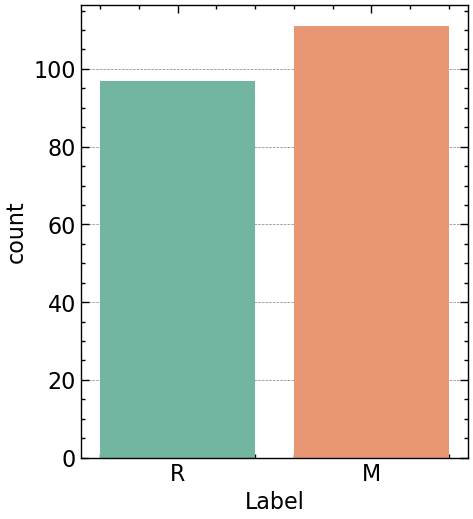

In [11]:
plt.figure(figsize=(5,6), dpi =100)
sns.countplot(x='Label', data=df, palette='Set2');

In [12]:
# matrix 
matrix = df.corr()

# mask
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(matrix)]=True

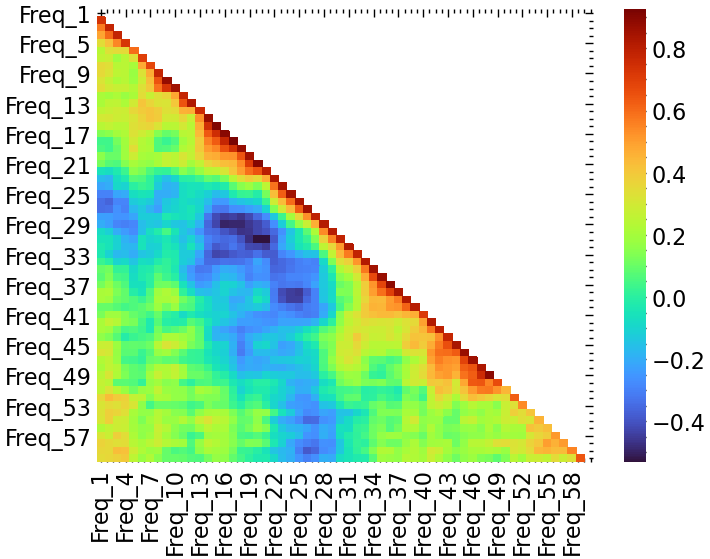

In [13]:
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(matrix, mask = mask, cmap='turbo');

In [14]:
# membagi data menjadi data columns dan data target
X = df.drop('Label', axis=1).values
y = df['Label']

In [15]:
# mentranform data label menjadi binner
from sklearn.preprocessing import LabelBinarizer

In [16]:
lb = LabelBinarizer()

In [17]:
y = lb.fit_transform(y).ravel()

In [18]:
lb.classes_

array(['M', 'R'], dtype='<U1')

In [19]:
# membagi data menjadi data latih dan data tes
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state= 42)

In [21]:
print(X_train, '\n')
print(y_train)

[[0.0265 0.044  0.0137 ... 0.0081 0.0086 0.0095]
 [0.0346 0.0509 0.0079 ... 0.0024 0.0079 0.0031]
 [0.0654 0.0649 0.0737 ... 0.044  0.0243 0.0098]
 ...
 [0.026  0.0192 0.0254 ... 0.0008 0.0044 0.0077]
 [0.0394 0.042  0.0446 ... 0.0068 0.0053 0.0087]
 [0.0587 0.121  0.1268 ... 0.0101 0.0228 0.0124]] 

[1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0]


In [22]:
# load library sklearn model knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [23]:
scaler = StandardScaler()

In [24]:
knn = KNeighborsClassifier()

In [25]:
operation = [('scaler', scaler),('knn', knn)]

In [26]:
pipe = Pipeline(operation)

<b> Hyperparameter Tuning GridSearchCV

In [27]:
k_values = list(range(1, 30))

In [28]:
param_grid = {'knn__n_neighbors': k_values}

In [29]:
grid_classifier = GridSearchCV(pipe,  param_grid, cv= 5, scoring='accuracy')

In [30]:
grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [31]:
grid_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [32]:
grid_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [33]:
grid_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [34]:
grid_classifier.cv_results_['mean_test_score']

array([0.85793651, 0.80650794, 0.79492063, 0.77206349, 0.80047619,
       0.74365079, 0.76095238, 0.72666667, 0.73793651, 0.71539683,
       0.73253968, 0.69825397, 0.70380952, 0.70396825, 0.73238095,
       0.71555556, 0.72698413, 0.70412698, 0.69301587, 0.69857143,
       0.71      , 0.69285714, 0.69301587, 0.69301587, 0.69888889,
       0.68746032, 0.69873016, 0.68730159, 0.69857143])

In [35]:
len(grid_classifier.cv_results_['mean_test_score'])

29

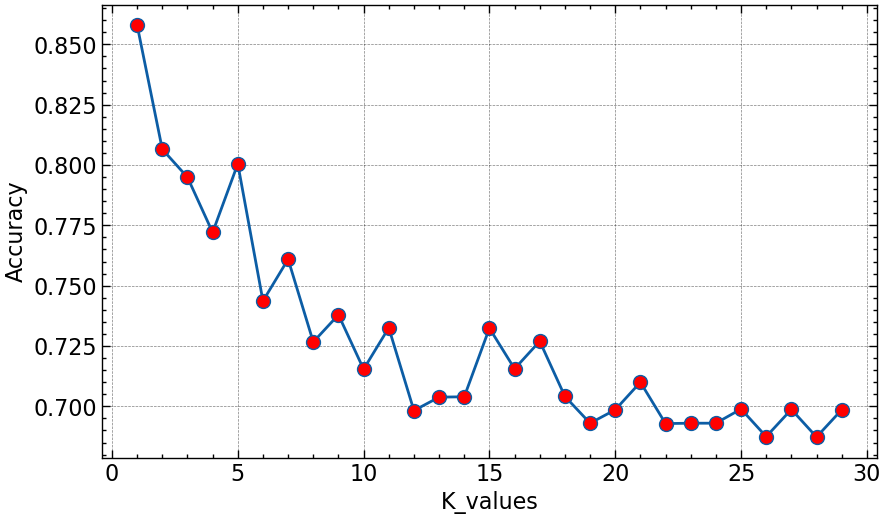

In [36]:
plt.figure(figsize=(10,6), dpi=100)
score = grid_classifier.cv_results_['mean_test_score']
plt.plot(range(1,30), score, 'o-', markersize=10, markerfacecolor='red')
plt.xlabel('K_values')
plt.ylabel('Accuracy')
plt.show()

### Final Model Evaluasi

In [37]:
predict_model = grid_classifier.predict(X_test)

In [38]:
confusion_matrix(y_test, predict_model)

array([[18,  1],
       [ 1, 12]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


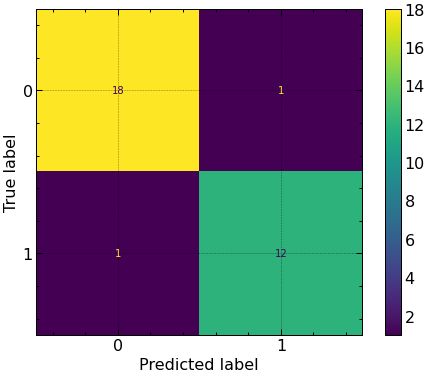

In [39]:
plot_confusion_matrix(grid_classifier,X_test, y_test)

In [40]:
print(classification_report(y_test,predict_model ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [41]:
accuracy_score(y_test, predict_model)

0.9375

-----